In [12]:
import numpy as np
import pandas as pd
import os
from tensorflow.keras.datasets import fashion_mnist
import tensorflow as tf
import keras

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")
    
def reconstructions(model,images=X_test,n_images=5):
    reconstruction = model.predict(images[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5,3))
    for image_index in range(n_images):
        plt.subplot(2,n_images,1+image_index)
        plot_image(images[image_index])
        plt.subplot(2,n_images,1+n_images + image_index)
        plot_image(reconstruction[image_index])


In [13]:
import matplotlib.pyplot as plt

In [14]:
def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

## Training all the layers at once

In [16]:
tf.random.set_seed(42)
np.random.seed(42)

X_train,

stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu"),
])
stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])
stacked_ae.compile(loss="binary_crossentropy",
                   optimizer=keras.optimizers.SGD(lr=1.5), metrics=[rounded_accuracy])
history = stacked_ae.fit(X_train, X_train, epochs=5,
                         validation_data=(X_valid, X_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 11s 203us/step - loss: 0.3379 - rounded_accuracy: 0.8867 - val_loss: 0.3178 - val_rounded_accuracy: 0.8990
Epoch 2/5
55000/55000 [==============================] - 9s 166us/step - loss: 0.3064 - rounded_accuracy: 0.9145 - val_loss: 0.3031 - val_rounded_accuracy: 0.9188
Epoch 3/5
55000/55000 [==============================] - 9s 168us/step - loss: 0.2996 - rounded_accuracy: 0.9204 - val_loss: 0.2978 - val_rounded_accuracy: 0.9235
Epoch 4/5
55000/55000 [==============================] - 9s 167us/step - loss: 0.2956 - rounded_accuracy: 0.9237 - val_loss: 0.2947 - val_rounded_accuracy: 0.9261
Epoch 5/5
55000/55000 [==============================] - 10s 173us/step - loss: 0.2930 - rounded_accuracy: 0.9260 - val_loss: 0.2953 - val_rounded_accuracy: 0.9274


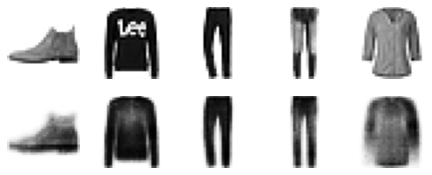

In [17]:
reconstructions(stacked_ae)